In [ ]:
import pandas as pd
import numpy as np
import joblib

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Vamos a trabajar con un conjunto de datos de 4.800 críticas de peliculas de usuarios de la página web de votación y recomendación de películas filmaffinity (www.filmaffinity.com) para calcular las metricas de los modelos.

Dicho data set es proporcionado por *elmundodelosdatos* y fue extraido del siguiente repositorio (https://raw.githubusercontent.com/captain500/elmundodelosdatos/main/5_sentiment_analysis/data/criticas.csv)

Dicho dataset fue bajado y paso por el mismo preprosesamiento que se realizo para los datasets de train y test.

In [ ]:
path = '/content/drive/MyDrive/DataSet prueba/df_prueba_preprocesado.csv'
df = pd.read_csv(path)
url = 'https://media.githubusercontent.com/media/ricadolcvuba/Dataset-TP2/main/df_train_preprocesado.csv'
df_train = pd.read_csv(url)

In [ ]:
x_test = df['review_es']
x_train = df_train['review_es']
y_test = df['sentimiento']

#XGBoost

In [ ]:
model_xgb = joblib.load('/content/drive/MyDrive/modelos/xgboost_n10cv10.joblib')

#Random forest

In [ ]:
model_rf = joblib.load('/content/drive/MyDrive/modelos/rf_n10cv10.joblib')

#NB

In [ ]:
model_nb = joblib.load('/content/drive/MyDrive/modelos/best_nb.joblib')

#RN

In [ ]:
model_rn = joblib.load('/content/drive/MyDrive/modelos/best_nb.joblib')

#Voting con Red neuronal, XGBoost y Random Forest

In [ ]:
model_voting = joblib.load('/content/drive/MyDrive/modelos/voting_rn_xgb_rf.joblib')

#Vectorizar

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
my_stop_words = stopwords.words('spanish')

# Instanciamos el CV
#Configurar el vectorizador de palabras para convertir el texto en una representación numérica.
vec = CountVectorizer(stop_words=my_stop_words, ngram_range=(1,2))

x_train_aux = vec.fit_transform(x_train)

x_test_aux = vec.transform(x_test)

#Predicciones

In [ ]:
y_pred_nb = model_nb.predict(x_test_aux)
y_pred_rf = model_rf.predict(x_test_aux)
y_pred_rn = model_rn.predict(x_test_aux)
y_pred_voting = model_voting.predict(x_test_aux)

In [ ]:
y_pred_nb

array(['negativo', 'negativo', 'negativo', ..., 'negativo', 'positivo',
       'positivo'], dtype='<U8')

In [ ]:
y_pred_rf

array(['negativo', 'negativo', 'positivo', ..., 'negativo', 'positivo',
       'positivo'], dtype=object)

In [ ]:
y_pred_rn

array(['negativo', 'negativo', 'negativo', ..., 'negativo', 'positivo',
       'positivo'], dtype='<U8')

In [ ]:
y_pred_voting

array(['negativo', 'negativo', 'positivo', ..., 'negativo', 'positivo',
       'positivo'], dtype=object)

Pasar a binario

In [ ]:
y_pred_xgb_binario = model_xgb.predict(x_test_aux)

In [ ]:
y_pred_xgb_binario

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
y_pred_nb_binario = np.where(y_pred_nb == 'positivo', 0, 1)
y_pred_nb_binario

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
y_pred_rf_binario = np.where(y_pred_rf == 'positivo', 0, 1)
y_pred_rf_binario

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
y_pred_rn_binario = np.where(y_pred_rn == 'positivo', 0, 1)
y_pred_rn_binario

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
y_pred_voting_binario = np.where(y_pred_voting == 'positivo', 0, 1)
y_pred_voting_binario

array([1, 1, 0, ..., 1, 0, 0])

#Metricas y matriz de confusion

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
def calcular_metricas_y_matriz_confusion(y_test, y_pred):

    #calcular las métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    #calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    return precision, recall, f1, accuracy, cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_metricas_y_matriz_confusion(precision, recall, f1, accuracy, cm, modelo):
  print(modelo)
  print(f"Precisión: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1}")
  print(f"Accuracy: {accuracy}")
  print()

  #Matriz de confusion
  print("Matriz de confusión:")
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusión - ' + modelo)
  plt.show()



In [ ]:
y_test_binario = np.array(y_test)

In [ ]:
y_test_binario

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#y_test_binario = np.where(y_test == 'positivo', 0, 1)
#y_test_binario

**NB**

In [ ]:
precision_nb, recall_nb, f1_nb, accuracy_nb, cm_nb = calcular_metricas_y_matriz_confusion(y_test_binario, y_pred_nb_binario)

Modelo Naive Bayes:
Precisión: 0.8530413625304136
Recall: 0.7304166666666667
F1-score: 0.7869809203142537
Accuracy: 0.8022916666666666

Matriz de confusión:


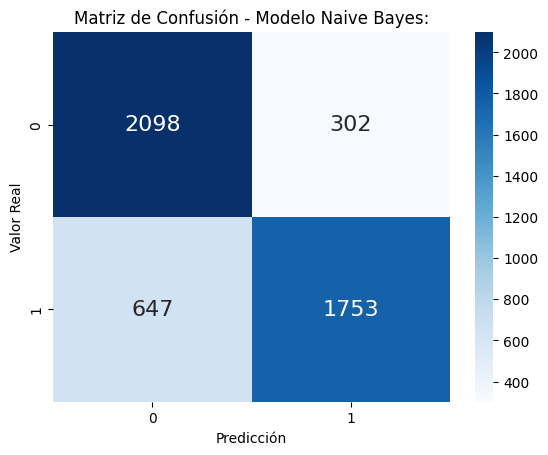

In [ ]:
print_metricas_y_matriz_confusion(precision_nb, recall_nb, f1_nb, accuracy_nb, cm_nb, "Modelo Naive Bayes:")

**XGBoost**

In [ ]:
precision_xgb, recall_xgb, f1_xgb, accuracy_xgb, cm_xgb = calcular_metricas_y_matriz_confusion(y_test_binario, y_pred_xgb_binario)

Modelo XGboost:
Precisión: 0.8200276880479926
Recall: 0.7404166666666666
F1-score: 0.7781913728924895
Accuracy: 0.7889583333333333

Matriz de confusión:


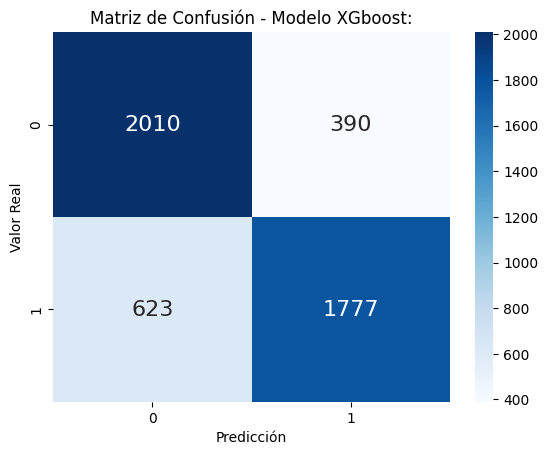

In [ ]:
print_metricas_y_matriz_confusion(precision_xgb, recall_xgb, f1_xgb, accuracy_xgb, cm_xgb, "Modelo XGboost:")

**Random Forest**

In [ ]:
precision_rf, recall_rf, f1_rf, accuracy_rf, cm_rf = calcular_metricas_y_matriz_confusion(y_test_binario, y_pred_rf_binario)

Modelo Random Forest:
Precisión: 0.8450555261766262
Recall: 0.6658333333333334
F1-score: 0.7448147285015149
Accuracy: 0.771875

Matriz de confusión:


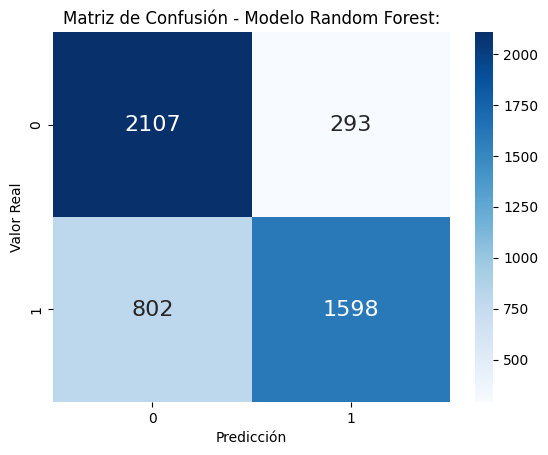

In [ ]:
print_metricas_y_matriz_confusion(precision_rf, recall_rf, f1_rf, accuracy_rf, cm_rf, "Modelo Random Forest:")

**Red Neuronal**

In [ ]:
precision_rn, recall_rn, f1_rn, accuracy_rn, cm_rn = calcular_metricas_y_matriz_confusion(y_test_binario, y_pred_rn_binario)

Modelo Red Neuronal:
Precisión: 0.8530413625304136
Recall: 0.7304166666666667
F1-score: 0.7869809203142537
Accuracy: 0.8022916666666666

Matriz de confusión:


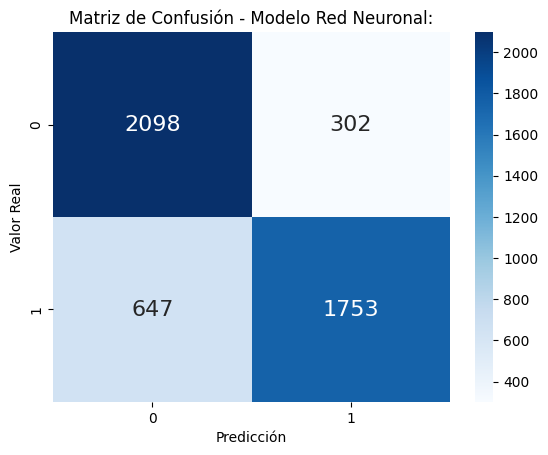

In [ ]:
print_metricas_y_matriz_confusion(precision_rn, recall_rn, f1_rn, accuracy_rn, cm_rn, "Modelo Red Neuronal:")

**Ensamble voting**

In [ ]:
precision_voting, recall_voting, f1_voting, accuracy_voting, cm_voting = calcular_metricas_y_matriz_confusion(y_test_binario, y_pred_voting_binario)

Modelo Ensamble voting:
Precisión: 0.8728728728728729
Recall: 0.7266666666666667
F1-score: 0.793087767166894
Accuracy: 0.8104166666666667

Matriz de confusión:


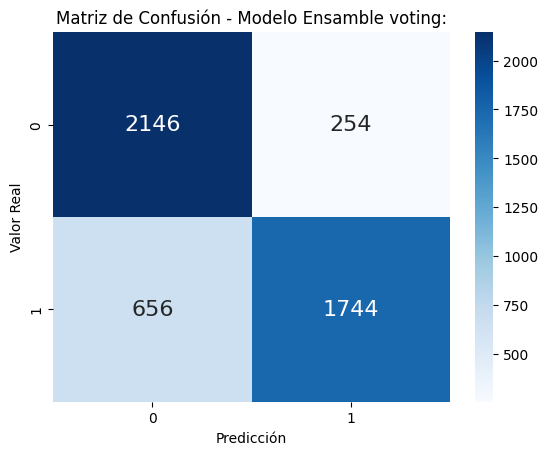

In [ ]:
print_metricas_y_matriz_confusion(precision_voting, recall_voting, f1_voting, accuracy_voting, cm_voting, "Modelo Ensamble voting:")